In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
df = titanic.copy()

In [18]:
# Número total de registros y columnas
num_registros, num_columnas = df.shape

# Espacio en memoria
memoria = df.memory_usage(deep=True).sum()

print("Número de registros:", num_registros)
print("Número de columnas:", num_columnas)
print(f"Memoria utilizada (bytes): {memoria}")

Número de registros: 891
Número de columnas: 15
Memoria utilizada (bytes): 321252


In [19]:
print("Tipos de datos:")
print(df.dtypes)

print("\nNombres de columnas:")
print(df.columns.tolist())

Tipos de datos:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Nombres de columnas:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [20]:
duplicados = df.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 107


In [39]:
df['alive'] = df['alive'].replace({'no':0,'yes':1})
result = df[['alive']].equals(df[['survived']])
print(result)  # Debería devolver True

False


In [11]:
try:
    df.drop(columns=['class','alive','embark_town'], inplace=True)
except:
    print('ya estan borradas')
df

ya estan borradas


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,True


In [14]:
(df.isnull().sum() / len(df))*100

survived       0.000000
pclass         0.000000
sex            0.000000
age           19.865320
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
who            0.000000
adult_male     0.000000
deck          77.216611
alone          0.000000
dtype: float64

In [40]:
df.drop(columns=['deck'],inplace=True)

In [42]:
df.to_parquet('titanic_limpio.parquet') 

------------

In [44]:
df = pd.read_parquet('titanic_limpio.parquet')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,0,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,1,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,0,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,1,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,0,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,1,True


              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


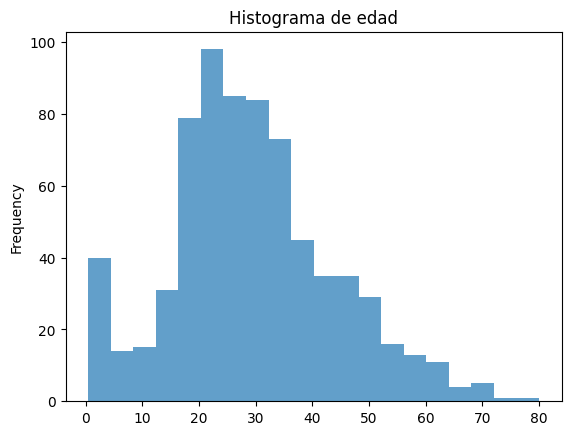

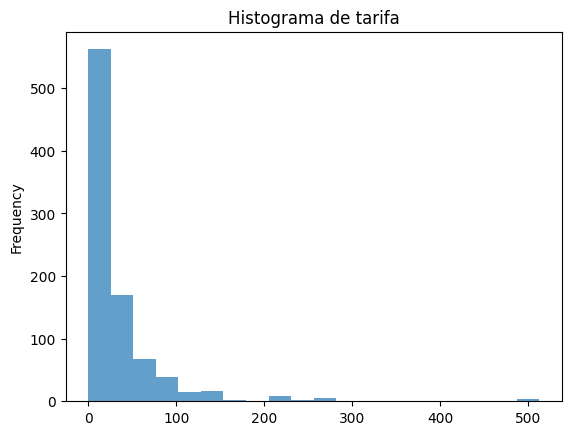

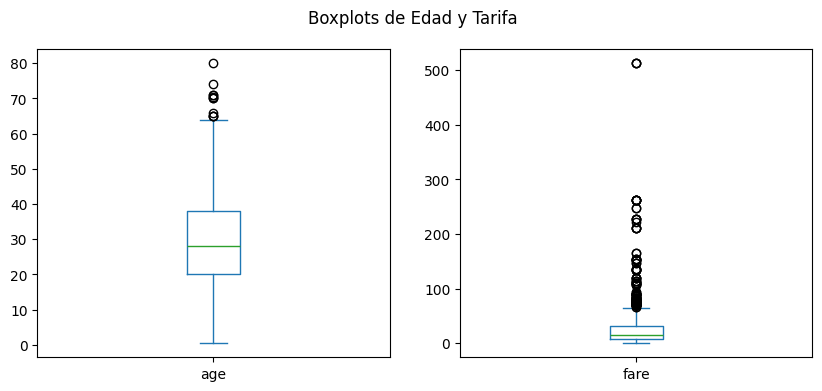

Shapiro-Wilk para edad: 0.9814577414504954 7.337348958673592e-08


In [47]:
# Estadísticas descriptivas
print(df[['age','fare']].describe())

# Histogramas
df['age'].plot(kind='hist', bins=20, alpha=0.7, title='Histograma de edad')
plt.show()

df['fare'].plot(kind='hist', bins=20, alpha=0.7, title='Histograma de tarifa')
plt.show()

# Boxplots
df[['age','fare']].plot(kind='box', subplots=True, layout=(1,2), figsize=(10,4), title='Boxplots de Edad y Tarifa')
plt.show()

# Pruebas de normalidad para 'age'
edad_sin_na = df['age'].dropna()
stat, p = stats.shapiro(edad_sin_na)
print("Shapiro-Wilk para edad:", stat, p)

sex
male      577
female    314
Name: count, dtype: int64
sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


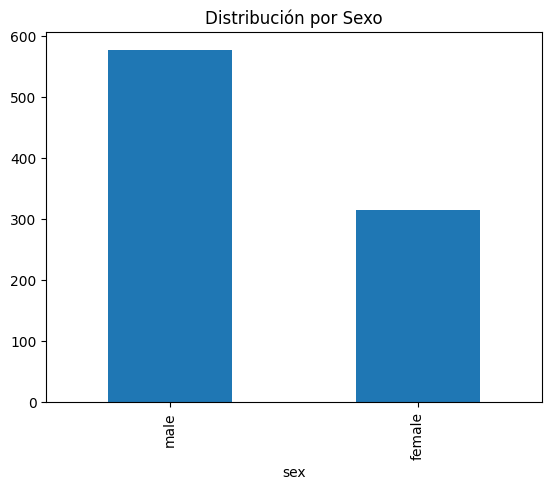

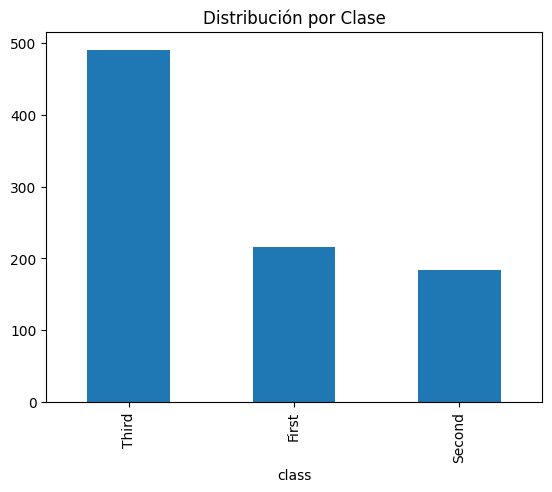

In [48]:
# Frecuencias absolutas y relativas de algunas variables categóricas
print(df['sex'].value_counts())
print(df['sex'].value_counts(normalize=True))

# Gráficos de barras
df['sex'].value_counts().plot(kind='bar', title='Distribución por Sexo')
plt.show()

df['class'].value_counts().plot(kind='bar', title='Distribución por Clase')
plt.show()

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


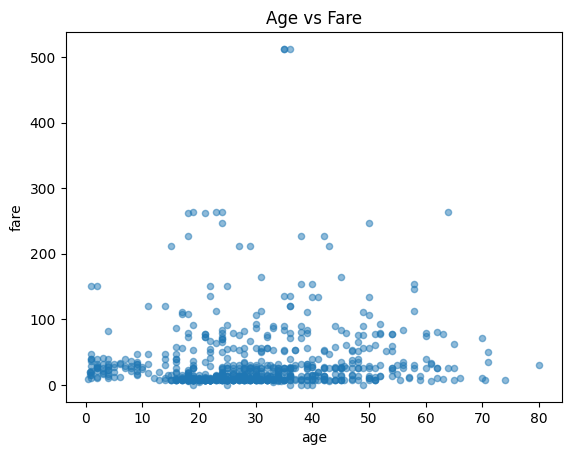

In [49]:
# Matriz de correlación
corr = df[['age','fare']].corr()
print(corr)

# Scatter plot entre edad y tarifa
df.plot(kind='scatter', x='age', y='fare', alpha=0.5, title='Age vs Fare')
plt.show()

In [50]:
# Tabla de contingencia entre sex y survived
tabla_cont = pd.crosstab(df['sex'], df['survived'])
print(tabla_cont)

# Test Chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(tabla_cont)
print("Chi-cuadrado:", chi2, "p-valor:", p)

survived    0    1
sex               
female     81  233
male      468  109
Chi-cuadrado: 260.71702016732104 p-valor: 1.1973570627755645e-58


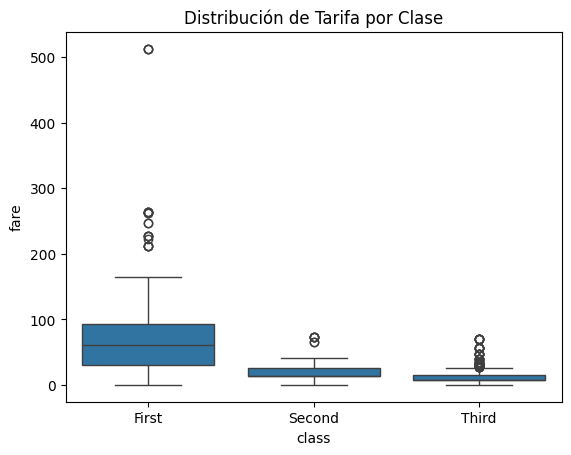

ANOVA fare vs class: F = 242.34415651744806 p = 1.0313763209142051e-84


In [51]:
# Boxplot de fare por clase
sns.boxplot(x='class', y='fare', data=df)
plt.title('Distribución de Tarifa por Clase')
plt.show()

# ANOVA entre fare y class
groups = [df['fare'][df['class']==c] for c in df['class'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA fare vs class: F =", f_stat, "p =", p_val)

In [54]:
import numpy as np

In [55]:
resumen = []
for col in df.columns:
    data = df[col].dropna()
    tipo_dato = df[col].dtype
    if tipo_dato in ['float64','int64']:
        var_tipo = 'numérica'
        card = data.nunique()
        dist = 'No Gaussiana' # según análisis preliminar
        missing_pct = df[col].isnull().mean()*100
        outliers_pct = 0  # estimación simplificada, podría calcularse por IQR
        rango = (data.min(), data.max())
        moda = data.mode()[0] if not data.mode().empty else np.nan
        mean_val = data.mean()
        median_val = data.median()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        # Test Shapiro
        stat_, p_ = stats.shapiro(data) if len(data)>3 else (np.nan, np.nan)
        normal_test = 'No Normal' if p_<0.05 else 'Normal'
        resumen.append([col, tipo_dato, var_tipo, card, dist, missing_pct, outliers_pct, rango, moda, mean_val, median_val, skew_val, kurtosis_val, normal_test])
    else:
        var_tipo = 'categórica'
        card = data.nunique()
        # Para categóricas no se aplica normalidad
        missing_pct = df[col].isnull().mean()*100
        resumen.append([col, tipo_dato, var_tipo, card, None, missing_pct, None, None, None, None, None, None, None, None])

resumen_df = pd.DataFrame(resumen, columns=['Variable','Tipo Dato','Tipo Variable','Cardinalidad','Distribución','% Missing','% Outliers','Rango','Moda','Media','Mediana','Asimetría','Curtosis','Prueba Normalidad'])
resumen_df


,Variable,Tipo Dato,Tipo Variable,Cardinalidad,Distribución,% Missing,% Outliers,Rango,Moda,Media,Mediana,Asimetría,Curtosis,Prueba Normalidad
0,survived,int64,numérica,2,No Gaussiana,0.000000,0.0,"(0, 1)",0.00,0.383838,0.0000,0.478523,-1.775005,No Normal
1,pclass,int64,numérica,3,No Gaussiana,0.000000,0.0,"(1, 3)",3.00,2.308642,3.0000,-0.630548,-1.280015,No Normal
2,sex,object,categórica,2,None,0.000000,NaN,None,NaN,NaN,NaN,NaN,NaN,None
3,age,float64,numérica,88,No Gaussiana,19.865320,0.0,"(0.42, 80.0)",24.00,29.699118,28.0000,0.389108,0.178274,No Normal
4,sibsp,int64,numérica,7,No Gaussiana,0.000000,0.0,"(0, 8)",0.00,0.523008,0.0000,3.695352,17.880420,No Normal
5,parch,int64,numérica,7,No Gaussiana,0.000000,0.0,"(0, 6)",0.00,0.381594,0.0000,2.749117,9.778125,No Normal
6,fare,float64,numérica,248,No Gaussiana,0.000000,0.0,"(0.0, 512.3292)",8.05,32.204208,14.4542,4.787317,33.398141,No Normal
7,embarked,object,categórica,3,None,0.224467,NaN,None,NaN,NaN,NaN,NaN,NaN,None
8,class,category,categórica,3,None,0.000000,NaN,None,NaN,NaN,NaN,NaN,NaN,None
9,who,object,categórica,3,None,0.000000,NaN,None,NaN,NaN,NaN,NaN,NaN,None
